In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv(r"C:\Users\user\Downloads\datasets\Hate_Crimes_2017-2025.csv")
print(df.head())

  Month Incident Number        Date of Incident Day of Week  \
0   Jan     2017-241137  01/01/2017 12:00:00 AM         Sun   
1   Feb     2017-580344  02/01/2017 12:00:00 AM         Wed   
2   Mar     2017-800291  03/21/2017 12:00:00 AM         Tue   
3   Apr    2017-1021534  04/12/2017 12:00:00 AM         Wed   
4   May    2017-1351550  05/15/2017 12:00:00 AM         Mon   

  Number of Victims under 18 Number of Victims over 18  \
0                          0                         1   
1                          0                         1   
2                          0                         0   
3                          0                         0   
4                          1                         0   

  Number of Offenders under 18 Number of Offenders over 18  \
0                            0                           1   
1                            0                           1   
2                            0                           0   
3                       

In [12]:
df.shape


(266, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         266 non-null    object 
 1   Incident Number               266 non-null    object 
 2   Date of Incident              266 non-null    object 
 3   Day of Week                   266 non-null    object 
 4   Number of Victims under 18    266 non-null    object 
 5   Number of Victims over 18     266 non-null    object 
 6   Number of Offenders under 18  266 non-null    object 
 7   Number of Offenders over 18   264 non-null    object 
 8   Race/Ethnicity of Offenders   266 non-null    object 
 9   Offense(s)                    266 non-null    object 
 10  Offense Location              266 non-null    object 
 11  Bias                          266 non-null    object 
 12  Zip Code                      265 non-null    float64
 13  APD S

In [14]:
df.describe()

,Zip Code,Council District
count,265.000000,265.000000
mean,78727.664151,6.018868
std,25.630024,3.021956
min,78613.000000,1.000000
25%,78704.000000,3.000000
50%,78731.000000,7.000000
75%,78750.000000,9.000000
max,78759.000000,10.000000


In [15]:
df.isnull().sum()

Month                           0
Incident Number                 0
Date of Incident                0
Day of Week                     0
Number of Victims under 18      0
Number of Victims over 18       0
Number of Offenders under 18    0
Number of Offenders over 18     2
Race/Ethnicity of Offenders     0
Offense(s)                      0
Offense Location                0
Bias                            0
Zip Code                        1
APD Sector                      1
Council District                1
dtype: int64

In [16]:
df.isnull().sum().sum()

np.int64(5)

In [17]:
df.drop_duplicates(inplace=True)


In [18]:
df.columns = df.columns.str.strip().str.replace(' ', '_')


In [19]:
df.isnull().sum()

Month                           0
Incident_Number                 0
Date_of_Incident                0
Day_of_Week                     0
Number_of_Victims_under_18      0
Number_of_Victims_over_18       0
Number_of_Offenders_under_18    0
Number_of_Offenders_over_18     2
Race/Ethnicity_of_Offenders     0
Offense(s)                      0
Offense_Location                0
Bias                            0
Zip_Code                        1
APD_Sector                      1
Council_District                1
dtype: int64

In [20]:
df['Number_of_Offenders_over_18'] = pd.to_numeric(df['Number_of_Offenders_over_18'], errors='coerce')


In [21]:
median_val = df['Number_of_Offenders_over_18'].median()
df['Number_of_Offenders_over_18'].fillna(median_val, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_4092\809102674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_of_Offenders_over_18'].fillna(median_val, inplace=True)


In [22]:
print(df['Number_of_Offenders_over_18'].isnull().sum())  
print(df['Number_of_Offenders_over_18'].dtype)  # should be float64 or int64


0
float64


In [23]:
df['Zip_Code'].fillna(df['Zip_Code'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_4092\3661770444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Zip_Code'].fillna(df['Zip_Code'].mode()[0], inplace=True)


In [24]:
df['APD_Sector'].fillna(df['APD_Sector'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_4092\434534493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['APD_Sector'].fillna(df['APD_Sector'].mode()[0], inplace=True)


In [25]:
df['Council_District'].fillna(df['Council_District'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_4092\3278347642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Council_District'].fillna(df['Council_District'].mode()[0], inplace=True)


In [26]:
df['Date_of_Incident'] = pd.to_datetime(df['Date_of_Incident'], errors='coerce')


C:\Users\user\AppData\Local\Temp\ipykernel_4092\4286006112.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_of_Incident'] = pd.to_datetime(df['Date_of_Incident'], errors='coerce')


In [27]:
df['Year'] = df['Date_of_Incident'].dt.year
df['Month'] = df['Date_of_Incident'].dt.month_name()
df['Day_Of_Week'] = df['Date_of_Incident'].dt.day_name()


In [28]:
print(df.isnull().sum())  # should all be 0
df.head()


Month                           0
Incident_Number                 0
Date_of_Incident                0
Day_of_Week                     0
Number_of_Victims_under_18      0
Number_of_Victims_over_18       0
Number_of_Offenders_under_18    0
Number_of_Offenders_over_18     0
Race/Ethnicity_of_Offenders     0
Offense(s)                      0
Offense_Location                0
Bias                            0
Zip_Code                        0
APD_Sector                      0
Council_District                0
Year                            0
Day_Of_Week                     0
dtype: int64


,Month,Incident_Number,Date_of_Incident,Day_of_Week,Number_of_Victims_under_18,Number_of_Victims_over_18,Number_of_Offenders_under_18,Number_of_Offenders_over_18,Race/Ethnicity_of_Offenders,Offense(s),Offense_Location,Bias,Zip_Code,APD_Sector,Council_District,Year,Day_Of_Week
0,January,2017-241137,2017-01-01,Sun,0,1,0,1.0,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0,2017,Sunday
1,February,2017-580344,2017-02-01,Wed,0,1,0,1.0,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0,2017,Wednesday
2,March,2017-800291,2017-03-21,Tue,0,0,0,0.0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0,2017,Tuesday
3,April,2017-1021534,2017-04-12,Wed,0,0,0,0.0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0,2017,Wednesday
4,May,2017-1351550,2017-05-15,Mon,1,0,1,2.0,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0,2017,Monday


In [29]:
# Drop the unnecessary/duplicate ones
df.drop(['Day_of_Week'], axis=1, inplace=True)


In [30]:
df.columns

Index(['Month', 'Incident_Number', 'Date_of_Incident',
       'Number_of_Victims_under_18', 'Number_of_Victims_over_18',
       'Number_of_Offenders_under_18', 'Number_of_Offenders_over_18',
       'Race/Ethnicity_of_Offenders', 'Offense(s)', 'Offense_Location', 'Bias',
       'Zip_Code', 'APD_Sector', 'Council_District', 'Year', 'Day_Of_Week'],
      dtype='object')

In [31]:
df.columns = df.columns.str.strip().str.replace(' ', '_')


In [32]:
df.columns

Index(['Month', 'Incident_Number', 'Date_of_Incident',
       'Number_of_Victims_under_18', 'Number_of_Victims_over_18',
       'Number_of_Offenders_under_18', 'Number_of_Offenders_over_18',
       'Race/Ethnicity_of_Offenders', 'Offense(s)', 'Offense_Location', 'Bias',
       'Zip_Code', 'APD_Sector', 'Council_District', 'Year', 'Day_Of_Week'],
      dtype='object')

In [33]:
df.rename(columns={'Day_Of_Week': 'Day_of_Week'}, inplace=True)


In [34]:
df.columns

Index(['Month', 'Incident_Number', 'Date_of_Incident',
       'Number_of_Victims_under_18', 'Number_of_Victims_over_18',
       'Number_of_Offenders_under_18', 'Number_of_Offenders_over_18',
       'Race/Ethnicity_of_Offenders', 'Offense(s)', 'Offense_Location', 'Bias',
       'Zip_Code', 'APD_Sector', 'Council_District', 'Year', 'Day_of_Week'],
      dtype='object')

In [35]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [36]:
df.columns

Index(['Month', 'Incident_Number', 'Date_of_Incident',
       'Number_of_Victims_under_18', 'Number_of_Victims_over_18',
       'Number_of_Offenders_under_18', 'Number_of_Offenders_over_18',
       'Race/Ethnicity_of_Offenders', 'Offense(s)', 'Offense_Location', 'Bias',
       'Zip_Code', 'APD_Sector', 'Council_District', 'Year', 'Day_of_Week'],
      dtype='object')

In [37]:
df.rename(columns={'day_of_week': 'Day_of_week'}, inplace=True)


In [38]:
df.columns

Index(['Month', 'Incident_Number', 'Date_of_Incident',
       'Number_of_Victims_under_18', 'Number_of_Victims_over_18',
       'Number_of_Offenders_under_18', 'Number_of_Offenders_over_18',
       'Race/Ethnicity_of_Offenders', 'Offense(s)', 'Offense_Location', 'Bias',
       'Zip_Code', 'APD_Sector', 'Council_District', 'Year', 'Day_of_Week'],
      dtype='object')

In [39]:
print(df.shape)
print(df.dtypes)
df.describe()


(266, 16)
Month                                   object
Incident_Number                         object
Date_of_Incident                datetime64[ns]
Number_of_Victims_under_18              object
Number_of_Victims_over_18               object
Number_of_Offenders_under_18            object
Number_of_Offenders_over_18            float64
Race/Ethnicity_of_Offenders             object
Offense(s)                              object
Offense_Location                        object
Bias                                    object
Zip_Code                               float64
APD_Sector                              object
Council_District                       float64
Year                                     int32
Day_of_Week                             object
dtype: object


,Date_of_Incident,Number_of_Offenders_over_18,Zip_Code,Council_District,Year
count,266,266.000000,266.000000,266.000000,266.000000
mean,2022-04-24 09:06:46.015037696,1.045113,78727.563910,6.030075,2021.781955
min,2017-01-01 00:00:00,0.000000,78613.000000,1.000000,2017.000000
25%,2020-11-07 12:00:00,1.000000,78704.000000,3.000000,2020.000000
50%,2022-11-09 00:00:00,1.000000,78731.000000,7.000000,2022.000000
75%,2024-02-24 06:00:00,1.000000,78750.000000,9.000000,2024.000000
max,2025-03-24 00:00:00,5.000000,78759.000000,10.000000,2025.000000
std,NaN,0.593864,25.633808,3.021782,2.278160


In [40]:
df.head()


,Month,Incident_Number,Date_of_Incident,Number_of_Victims_under_18,Number_of_Victims_over_18,Number_of_Offenders_under_18,Number_of_Offenders_over_18,Race/Ethnicity_of_Offenders,Offense(s),Offense_Location,Bias,Zip_Code,APD_Sector,Council_District,Year,Day_of_Week
0,January,2017-241137,2017-01-01,0,1,0,1.0,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0,2017,Sunday
1,February,2017-580344,2017-02-01,0,1,0,1.0,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0,2017,Wednesday
2,March,2017-800291,2017-03-21,0,0,0,0.0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0,2017,Tuesday
3,April,2017-1021534,2017-04-12,0,0,0,0.0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0,2017,Wednesday
4,May,2017-1351550,2017-05-15,1,0,1,2.0,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0,2017,Monday


In [41]:
df.tail()

,Month,Incident_Number,Date_of_Incident,Number_of_Victims_under_18,Number_of_Victims_over_18,Number_of_Offenders_under_18,Number_of_Offenders_over_18,Race/Ethnicity_of_Offenders,Offense(s),Offense_Location,Bias,Zip_Code,APD_Sector,Council_District,Year,Day_of_Week
261,February,2025-9004370,2025-02-27,0,1,0,1.0,White/Non-Hispanic,Harassment,Bar/Nightclub,Anti-Lesbian/Bisexual/Transgender (Mixed Group),78745.0,David,3.0,2025,Thursday
262,March,2025-601075,2025-03-02,1,0,0,1.0,White/Non-Hispanic,Assault,Hwy/Road/Alley/Street/Sidewalk,Anti-White/Anti-Hispanic or Latino,78741.0,Henry,3.0,2025,Sunday
263,March,2025-640147,2025-03-05,0,1,0,1.0,White/Non-Hispanic,Assault,Hwy/Road/Alley/Street/Sidewalk,Anti-Black or African American,78701.0,George,9.0,2025,Wednesday
264,March,2025-9004907,2025-03-07,0,1,0,2.0,White/Non-Hispanic,Harassment,Residence/Home,Anti-Gay (Male),78705.0,Baker,9.0,2025,Friday
265,March,2025-830165,2025-03-24,0,2,0,1.0,White/Hispanic,Aggravated Assault,Hwy/Road/Alley/Street/Sidewalk,Anti-Gay (Male),78758.0,Edward,4.0,2025,Monday


C:\Users\user\AppData\Local\Temp\ipykernel_4092\2278146808.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')


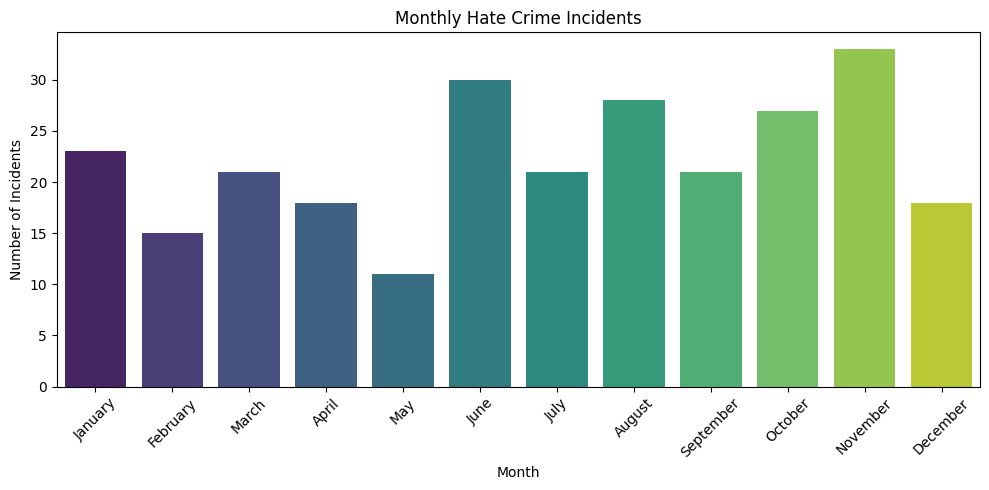

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Month and plot
monthly_counts = df['Month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title("Monthly Hate Crime Incidents")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()


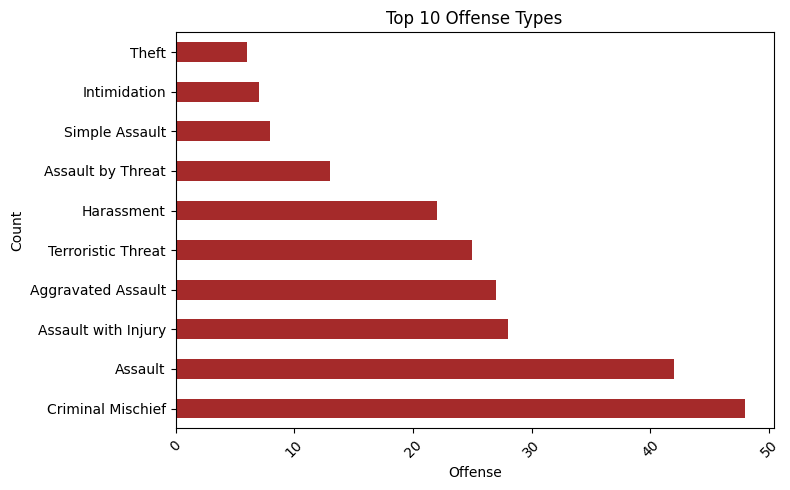

In [43]:
df['Offense(s)'].value_counts().head(10).plot(kind='barh', color='brown', figsize=(8,5))
plt.title("Top 10 Offense Types")
plt.xlabel("Offense")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


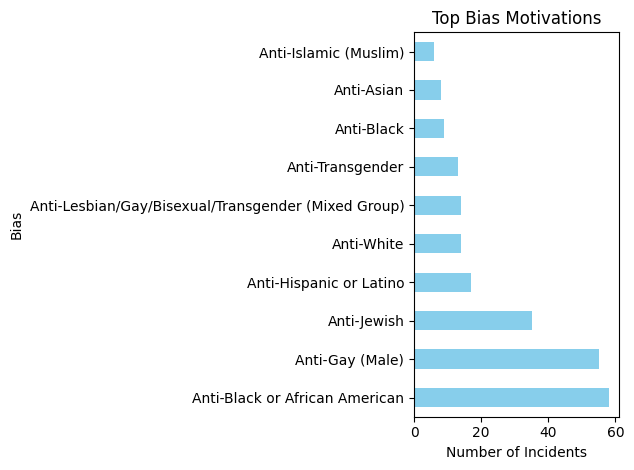

In [44]:
df['Bias'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top Bias Motivations")
plt.xlabel("Number of Incidents")
plt.tight_layout()
plt.show()


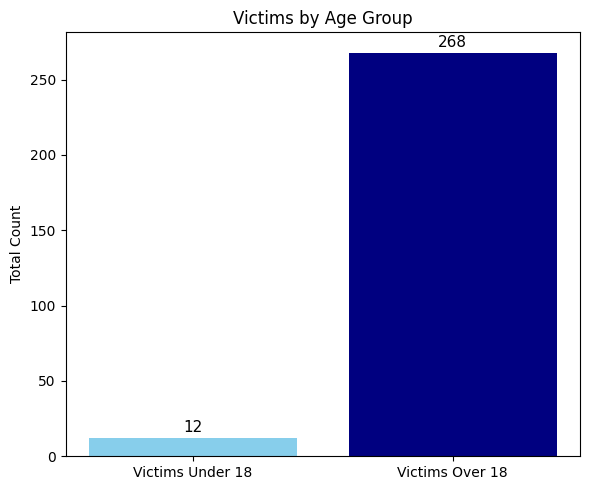

In [45]:
import matplotlib.pyplot as plt


victims_under_18 = pd.to_numeric(df['Number_of_Victims_under_18'], errors='coerce').sum()
victims_over_18 = pd.to_numeric(df['Number_of_Victims_over_18'], errors='coerce').sum()


labels = ['Victims Under 18', 'Victims Over 18']
values = [victims_under_18, victims_over_18]


plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'navy'])


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, int(height),
             ha='center', va='bottom', fontsize=11)


plt.title("Victims by Age Group")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()


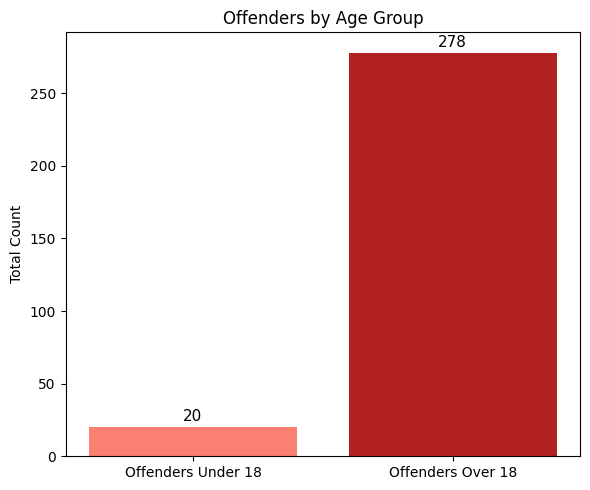

In [46]:
import matplotlib.pyplot as plt


offenders_under_18 = pd.to_numeric(df['Number_of_Offenders_under_18'], errors='coerce').sum()
offenders_over_18 = pd.to_numeric(df['Number_of_Offenders_over_18'], errors='coerce').sum()


labels = ['Offenders Under 18', 'Offenders Over 18']
values = [offenders_under_18, offenders_over_18]


plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['salmon', 'firebrick'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, int(height),
             ha='center', va='bottom', fontsize=11)


plt.title("Offenders by Age Group")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_4092\877441628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Bias', order=df['Bias'].value_counts().index, palette='coolwarm')


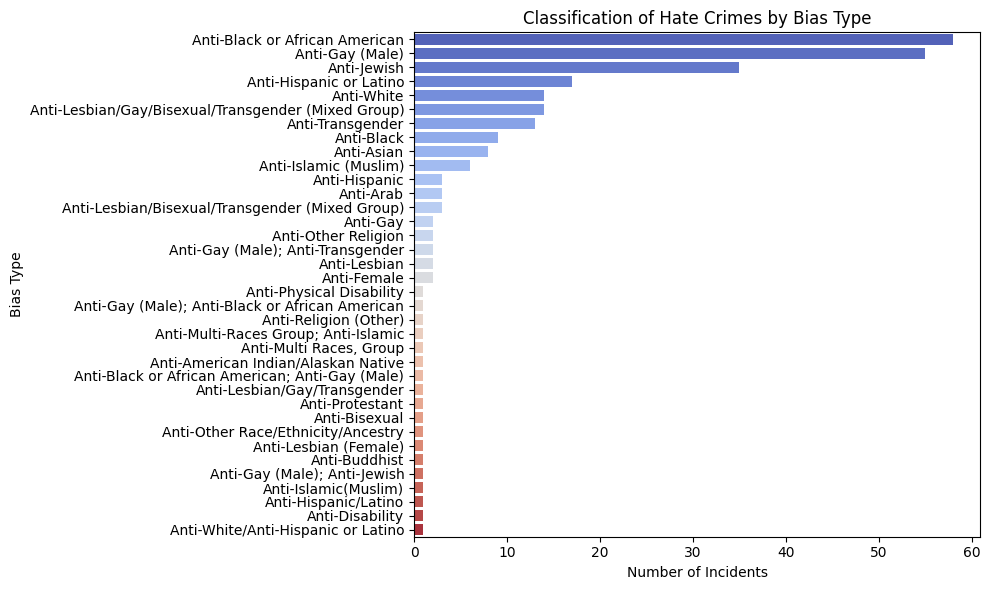

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Bias', order=df['Bias'].value_counts().index, palette='coolwarm')

plt.title("Classification of Hate Crimes by Bias Type")
plt.xlabel("Number of Incidents")
plt.ylabel("Bias Type")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_4092\2867890396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Offense(s)', order=df['Offense(s)'].value_counts().index, palette='viridis')


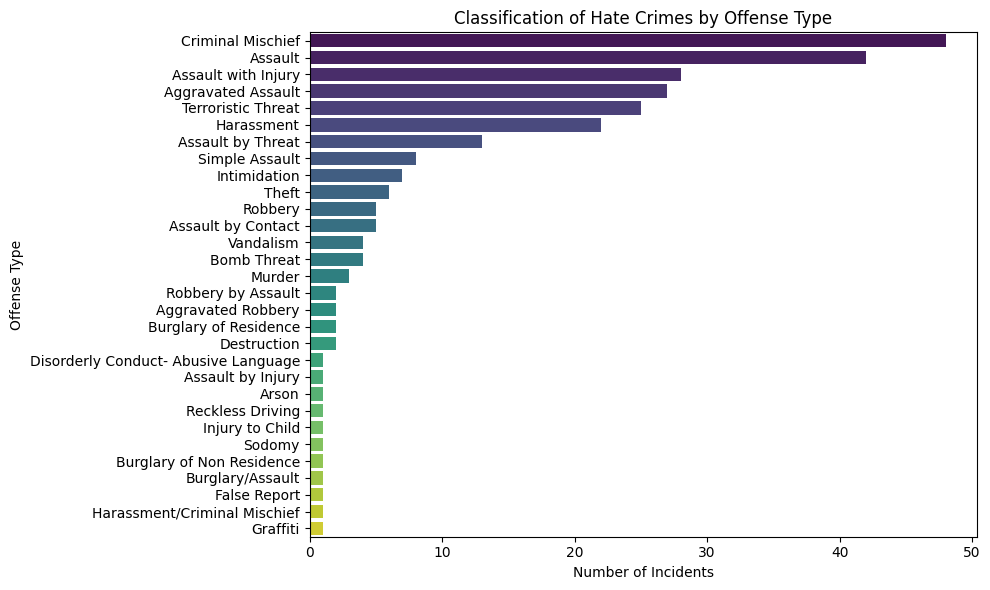

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Offense(s)', order=df['Offense(s)'].value_counts().index, palette='viridis')

plt.title("Classification of Hate Crimes by Offense Type")
plt.xlabel("Number of Incidents")
plt.ylabel("Offense Type")
plt.tight_layout()
plt.show()


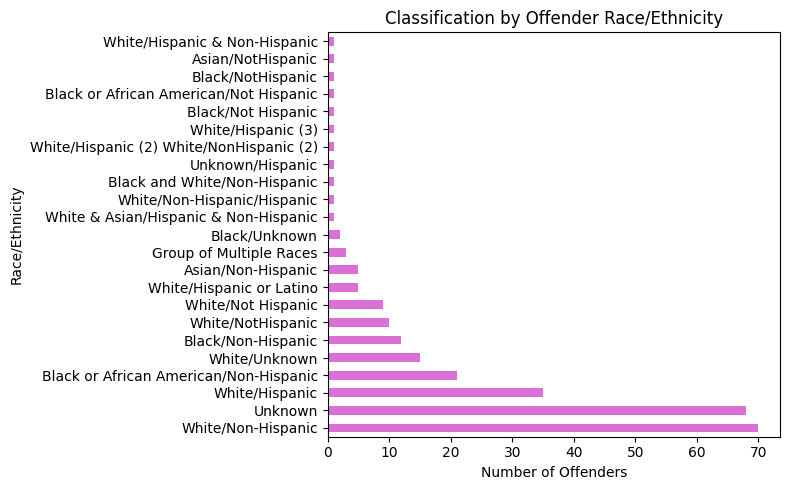

In [49]:
plt.figure(figsize=(8,5))
df['Race/Ethnicity_of_Offenders'].value_counts().plot(kind='barh', color='orchid')

plt.title("Classification by Offender Race/Ethnicity")
plt.xlabel("Number of Offenders")
plt.ylabel("Race/Ethnicity")
plt.tight_layout()
plt.show()


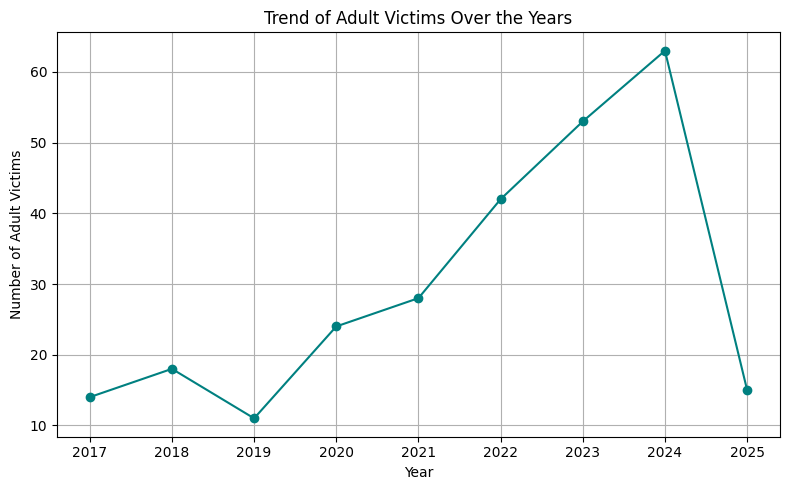

In [50]:

df['Number_of_Victims_over_18'] = pd.to_numeric(df['Number_of_Victims_over_18'], errors='coerce')


import matplotlib.pyplot as plt

# Group by year and sum adult victims
adult_victims_by_year = df.groupby('Year')['Number_of_Victims_over_18'].sum()


adult_victims_by_year.plot(kind='line', marker='o', color='teal', figsize=(8, 5))
plt.title("Trend of Adult Victims Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Adult Victims")
plt.grid(True)
plt.tight_layout()
plt.show()


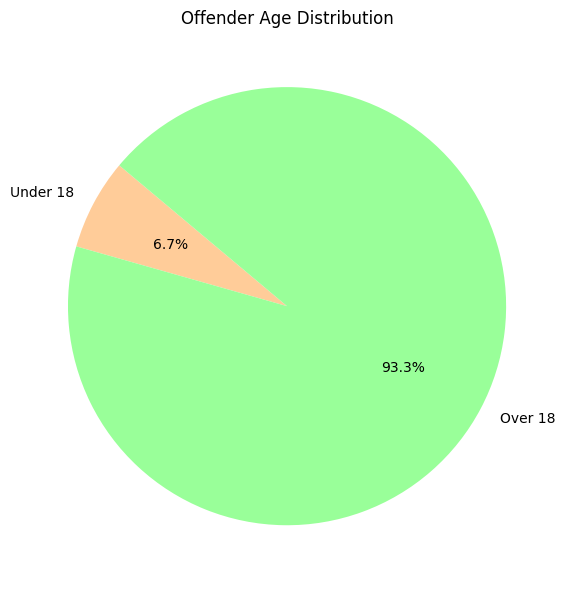

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
df['Number_of_Offenders_under_18'] = pd.to_numeric(df['Number_of_Offenders_under_18'], errors='coerce')
df['Number_of_Offenders_over_18'] = pd.to_numeric(df['Number_of_Offenders_over_18'], errors='coerce')


offender_counts = df[['Number_of_Offenders_under_18', 'Number_of_Offenders_over_18']].sum()
labels = ['Under 18', 'Over 18']
colors = ['#ffcc99','#99ff99']

plt.figure(figsize=(6,6))
plt.pie(offender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Offender Age Distribution")
plt.tight_layout()
plt.show()


In [52]:
df['Date_of_Incident'] = pd.to_datetime(df['Date_of_Incident'])


In [53]:
from IPython.display import display,HTML
display(HTML("<h2><b>1. Year with the most hate crimes<b></h2>"))

In [54]:
df['Year'] = df['Date_of_Incident'].dt.year
df['Year'].value_counts().sort_values(ascending=False)


Year
2024    59
2023    51
2022    43
2021    26
2020    24
2018    20
2017    17
2025    15
2019    11
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_4092\2537696638.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


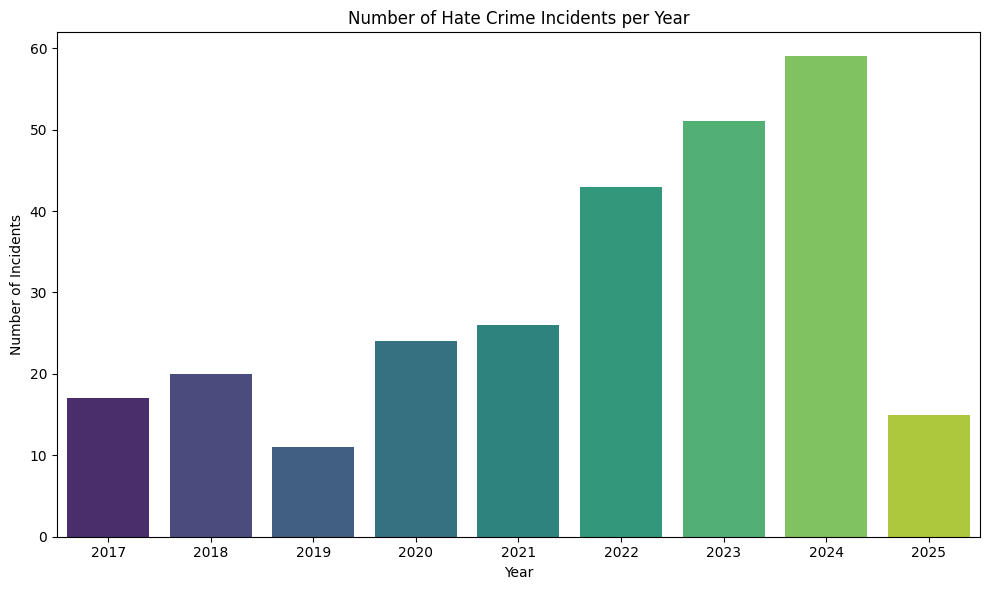

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of incidents per year
year_counts = df['Year'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")

plt.title("Number of Hate Crime Incidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()

Conclusion: The year 2024 recorded the highest number of hate crimes, with 59 reported incidents.
This marks a steady increase from previous years, possibly indicating a rise in hate crime activity,

In [56]:
from IPython.display import display,HTML
display(HTML("<h2><b>2. Month with most incidents<b></h2>"))

In [57]:
df['Month'] = df['Date_of_Incident'].dt.month_name()

df['Month'].value_counts()


Month
November     33
June         30
August       28
October      27
January      23
March        21
July         21
September    21
April        18
December     18
February     15
May          11
Name: count, dtype: int64

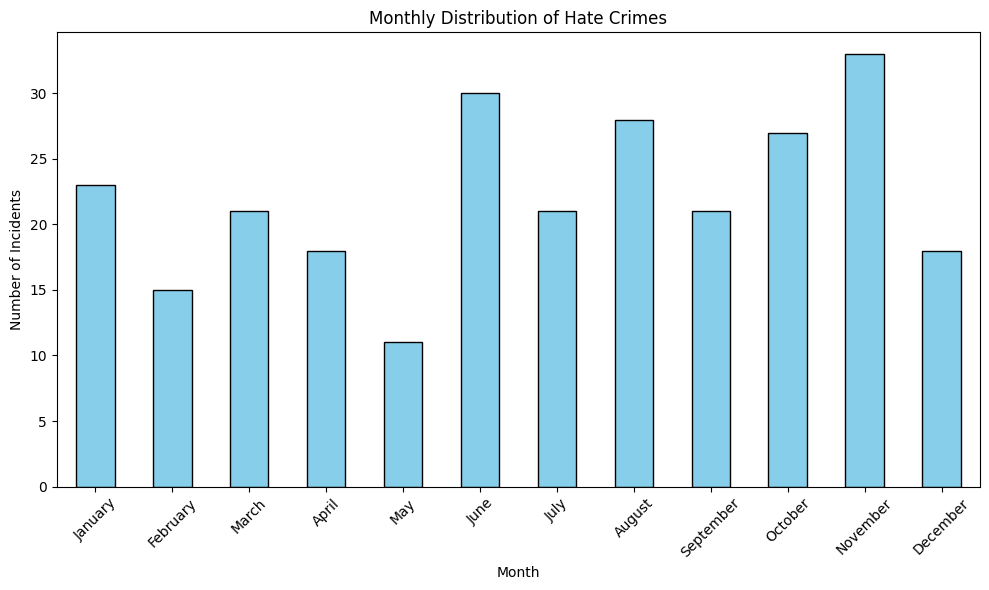

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Create month name from date
df['Month'] = df['Date_of_Incident'].dt.month_name()

# Define proper chronological order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Count and reindex to proper order
month_counts = df['Month'].value_counts().reindex(months_order)


# Plot
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Monthly Distribution of Hate Crimes")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 conclusion: November had the highest number of reported hate crime incidents, with a total of 33 cases.
This suggests that hate crimes tend to peak during late fall.

In [59]:
from IPython.display import display,HTML
display(HTML("<h2><b>3. Date range<b></h2>"))

In [60]:
df['Date_of_Incident'].min(), df['Date_of_Incident'].max()


(Timestamp('2017-01-01 00:00:00'), Timestamp('2025-03-24 00:00:00'))

Conclusion: The dataset covers hate crime incidents reported between January 1, 2017 and March 24, 2025.

In [61]:
from IPython.display import display,HTML
display(HTML("<h2><b>4. Date with highest number of incidents<b></h2>"))

In [62]:

df['Date_of_Incident'].value_counts().head(1)

Date_of_Incident
2021-08-25    3
Name: count, dtype: int64

Conclusion: The date with the most reported hate crime incidents is August 25, 2021, with 3 separate cases recorded on that day.

In [63]:
cols_to_fix = [
    'Number_of_Victims_under_18', 'Number_of_Victims_over_18',
    'Number_of_Offenders_under_18', 'Number_of_Offenders_over_18'
]

for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid strings become NaN


In [64]:
df[cols_to_fix].sum()

Number_of_Victims_under_18       12.0
Number_of_Victims_over_18       268.0
Number_of_Offenders_under_18     20.0
Number_of_Offenders_over_18     278.0
dtype: float64

In [65]:
from IPython.display import display,HTML
display(HTML("<h2><b>5. Total number of victims under and over 18<b></h2>"))

In [66]:
df[['Number_of_Victims_under_18', 'Number_of_Victims_over_18']].sum()


Number_of_Victims_under_18     12.0
Number_of_Victims_over_18     268.0
dtype: float64

Conclusion: This indicates that over 95% of the victims were adults

In [67]:
from IPython.display import display,HTML
display(HTML("<h2><b>6. Total number of offenders under and over 18<b></h2>"))

In [68]:
df[['Number_of_Offenders_under_18', 'Number_of_Offenders_over_18']].sum()


Number_of_Offenders_under_18     20.0
Number_of_Offenders_over_18     278.0
dtype: float64

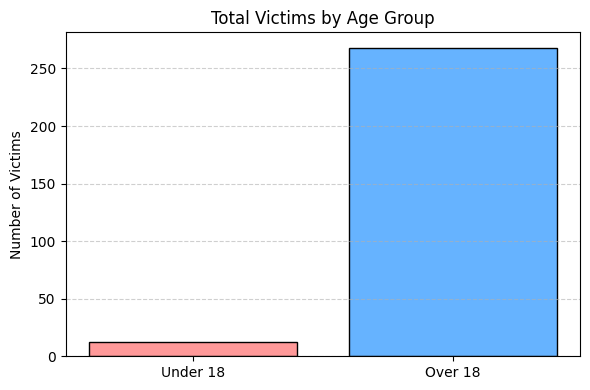

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure numeric types
df['Number_of_Victims_under_18'] = pd.to_numeric(df['Number_of_Victims_under_18'], errors='coerce')
df['Number_of_Victims_over_18'] = pd.to_numeric(df['Number_of_Victims_over_18'], errors='coerce')

# Sum values
victim_counts = df[['Number_of_Victims_under_18', 'Number_of_Victims_over_18']].sum()

# Labels and colors
labels = ['Under 18', 'Over 18']
colors = ['#FF9999', '#66B3FF']

# Bar Plot
plt.figure(figsize=(6, 4))
plt.bar(labels, victim_counts, color=colors, edgecolor='black')
plt.title("Total Victims by Age Group")
plt.ylabel("Number of Victims")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


conclusion: This means that over 93% of offenders were adults, suggesting that hate crimes are predominantly committed by individuals aged 18 and above.

In [70]:
from IPython.display import display,HTML
display(HTML("<h2><b>7. Yearly trend of youth victims<b></h2>"))

In [71]:
df.groupby(df['Year'])['Number_of_Victims_under_18'].sum()


Year
2017    1.0
2018    1.0
2019    1.0
2020    0.0
2021    2.0
2022    4.0
2023    1.0
2024    1.0
2025    1.0
Name: Number_of_Victims_under_18, dtype: float64

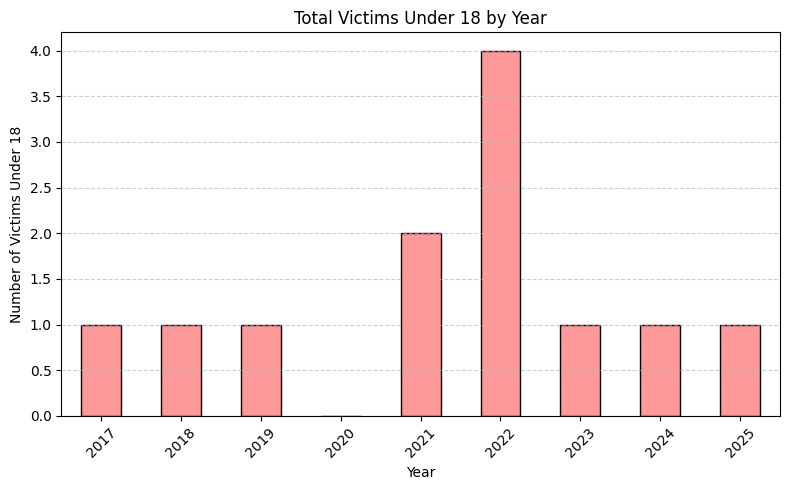

In [72]:
df['Number_of_Victims_under_18'] = pd.to_numeric(df['Number_of_Victims_under_18'], errors='coerce')

import matplotlib.pyplot as plt

# Group by Year and sum victims under 18
victims_under18_by_year = df.groupby(df['Year'])['Number_of_Victims_under_18'].sum()

# Plot
plt.figure(figsize=(8, 5))
victims_under18_by_year.plot(kind='bar', color='#ff9999', edgecolor='black')

plt.title("Total Victims Under 18 by Year")
plt.xlabel("Year")
plt.ylabel("Number of Victims Under 18")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Conclusion: The number of minor victims (under 18) per year is relatively low and does not show a consistent upward or downward trend.
The highest was in 2022 with 4 victims, while 2020 had none. 

In [73]:
from IPython.display import display,HTML
display(HTML("<h2><b>8. Which age group is more common among offenders<b></h2>"))

In [74]:
df[['Number_of_Offenders_under_18', 'Number_of_Offenders_over_18']].sum()


Number_of_Offenders_under_18     20.0
Number_of_Offenders_over_18     278.0
dtype: float64

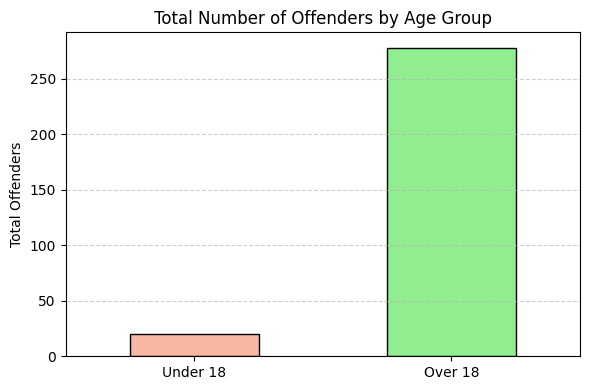

In [75]:
import matplotlib.pyplot as plt

# Summing offenders by age group
offender_counts = df[['Number_of_Offenders_under_18', 'Number_of_Offenders_over_18']].sum()

# Bar plot
plt.figure(figsize=(6, 4))
offender_counts.plot(kind='bar', color=['#f7b7a3', '#90ee90'], edgecolor='black')

plt.title("Total Number of Offenders by Age Group")
plt.ylabel("Total Offenders")
plt.xticks([0, 1], ['Under 18', 'Over 18'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Coclusion:This reinforces the finding that the vast majority of hate crime offenders are adults, accounting for over 93% of the total.

In [76]:
from IPython.display import display,HTML
display(HTML("<h2><b>9. Most common offense type<b></h2>"))

In [77]:
df['Offense(s)'].value_counts().head()


Offense(s)
Criminal Mischief      48
Assault                42
Assault with Injury    28
Aggravated Assault     27
Terroristic Threat     25
Name: count, dtype: int64

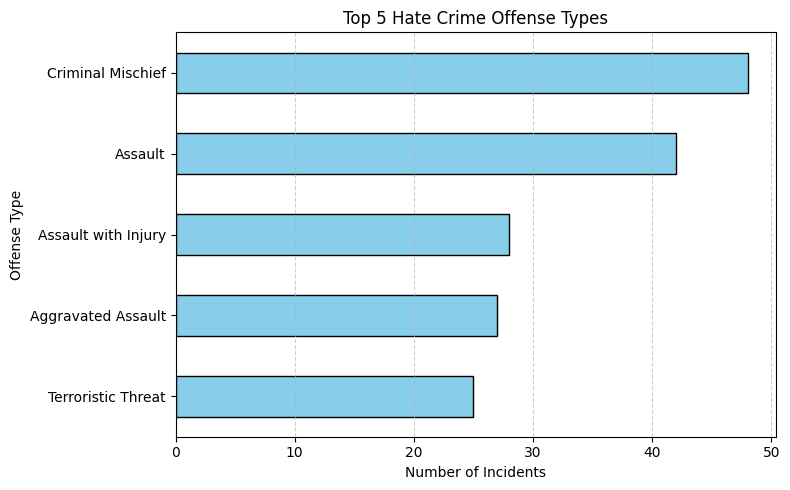

In [78]:
import matplotlib.pyplot as plt

# Get top 5 offense types
top_offenses = df['Offense(s)'].value_counts().head()

# Plot
plt.figure(figsize=(8, 5))
top_offenses.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title("Top 5 Hate Crime Offense Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Offense Type")
plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Conclusion: Property damage and physical violence are the most common forms of hate crimes, with both non-injury and injury-related assaults being highly prevalent.

In [79]:
from IPython.display import display,HTML
display(HTML("<h2><b>10. Most common bias type<b></h2>"))

In [80]:
df['Bias'].value_counts().head()


Bias
Anti-Black or African American    58
Anti-Gay (Male)                   55
Anti-Jewish                       35
Anti-Hispanic or Latino           17
Anti-White                        14
Name: count, dtype: int64

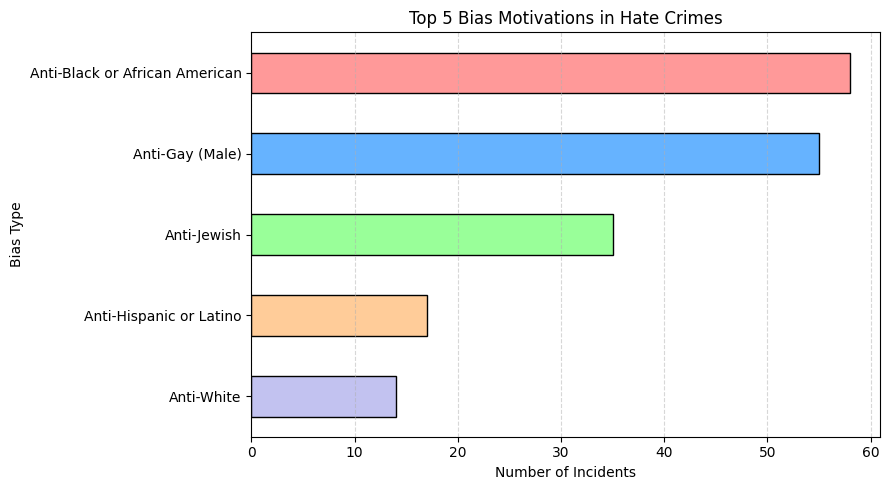

In [81]:
import matplotlib.pyplot as plt

top_bias = df['Bias'].value_counts().head()

# Plot
plt.figure(figsize=(9, 5))
top_bias.plot(kind='barh', color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], edgecolor='black')

plt.title("Top 5 Bias Motivations in Hate Crimes")
plt.xlabel("Number of Incidents")
plt.ylabel("Bias Type")
plt.gca().invert_yaxis()  # Highest value on top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Conclusion: This indicates that hate crimes in the dataset are most often motivated by racial and sexual orientation bias, with Black individuals and gay men being the most targeted groups.

In [82]:
from IPython.display import display,HTML
display(HTML("<h2><b>11. Are hate crimes increasing or decreasing over the years?<b></h2>"))

In [83]:
df.groupby('Year').size()


Year
2017    17
2018    20
2019    11
2020    24
2021    26
2022    43
2023    51
2024    59
2025    15
dtype: int64

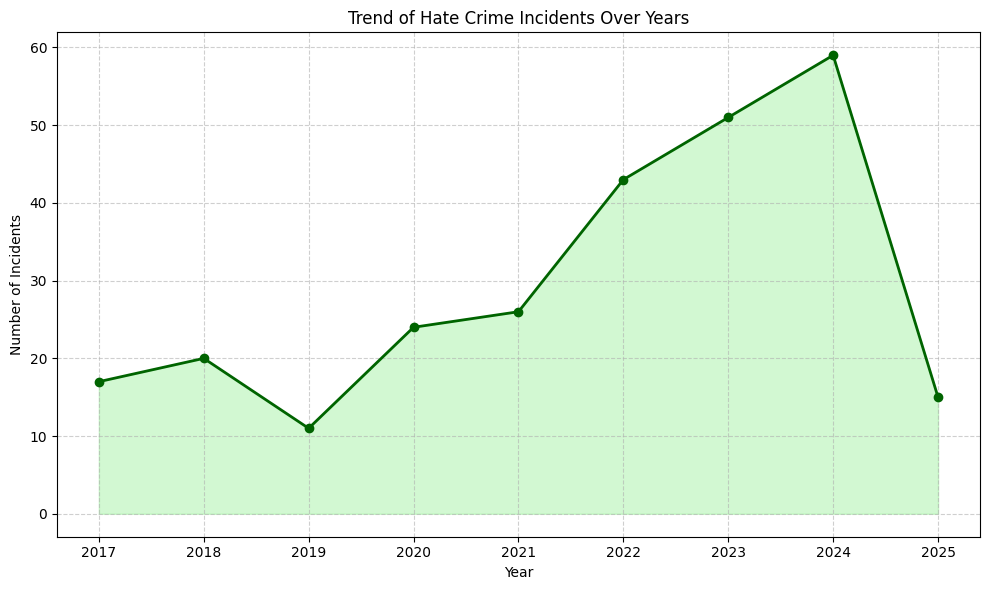

In [84]:
import matplotlib.pyplot as plt

# Group by year and count incidents
yearly_counts = df.groupby('Year').size()

# Range-like line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='darkgreen', linewidth=2)

plt.title("Trend of Hate Crime Incidents Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True, linestyle='--', alpha=0.6)
plt.fill_between(yearly_counts.index, yearly_counts.values, color='lightgreen', alpha=0.4)  # fills area under curve
plt.tight_layout()
plt.show()


Conclusion: The data shows a steady increase in hate crimes over time:
From 17 incidents in 2017
Peaking at 59 incidents in 2024

In [85]:
from IPython.display import display,HTML
display(HTML("<h2><b>12. Which offense is most common in each year?<b></h2>"))

In [86]:
df.groupby('Year')['Offense(s)'].agg(lambda x: x.value_counts().index[0])


Year
2017         Simple Assault
2018                Assault
2019                Assault
2020      Criminal Mischief
2021    Assault with Injury
2022    Assault with Injury
2023      Criminal Mischief
2024                Assault
2025                Assault
Name: Offense(s), dtype: object

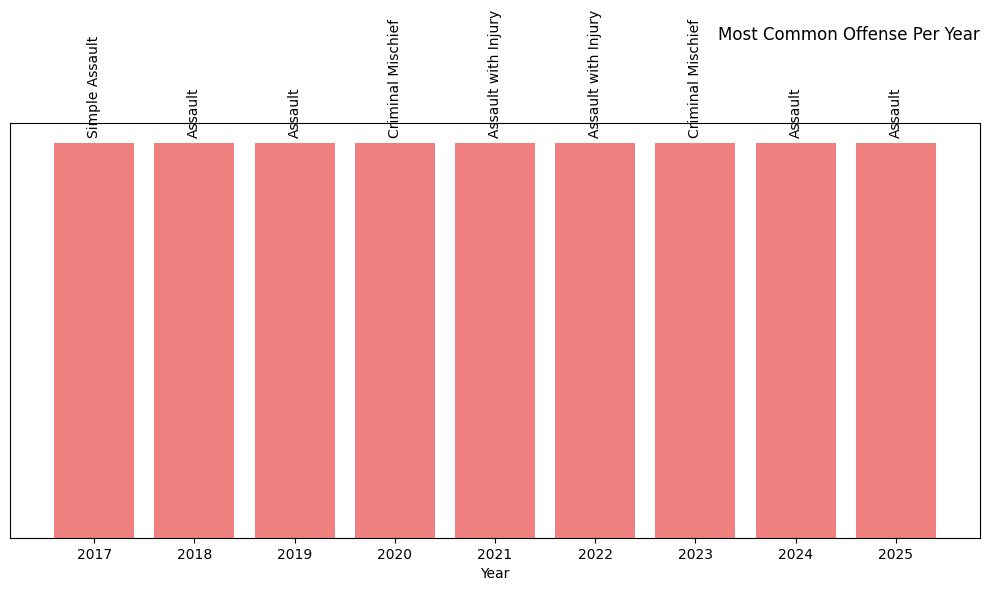

In [87]:
import matplotlib.pyplot as plt

# Get most frequent offense per year
top_offense_per_year = df.groupby('Year')['Offense(s)'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_offense_per_year['Year'].astype(str), [1]*len(top_offense_per_year), color='lightcoral')

# Add text labels (offense names) on top of bars
for i, offense in enumerate(top_offense_per_year['Offense(s)']):
    plt.text(i, 1.02, offense, ha='center', rotation=90, fontsize=10)

plt.title("Most Common Offense Per Year",fontsize=12, pad=60, loc='right')
plt.xlabel("Year")
plt.yticks([])  # Hide y-axis values
plt.tight_layout()
plt.show()


Conclusion: Assault (or related types like Assault with Injury) was the top offense in most years (2018, 2019, 2021, 2022, 2024, 2025).
Criminal Mischief appeared most often in 2020 and 2023.
Simple Assault led in 2017.
This suggests a persistent pattern of physical violence as a leading form of hate crime across the years, with property-related crimes occasionally surging in certain years.

In [88]:
from IPython.display import display,HTML
display(HTML("<h2><b>13. Is there any correlation between victim and offender age groups?<b></h2>"))

In [89]:
df[['Number_of_Victims_under_18', 'Number_of_Victims_over_18',
    'Number_of_Offenders_under_18', 'Number_of_Offenders_over_18']].corr()


,Number_of_Victims_under_18,Number_of_Victims_over_18,Number_of_Offenders_under_18,Number_of_Offenders_over_18
Number_of_Victims_under_18,1.000000,-0.510246,0.374347,-0.138851
Number_of_Victims_over_18,-0.510246,1.000000,-0.149690,0.252665
Number_of_Offenders_under_18,0.374347,-0.149690,1.000000,-0.227044
Number_of_Offenders_over_18,-0.138851,0.252665,-0.227044,1.000000


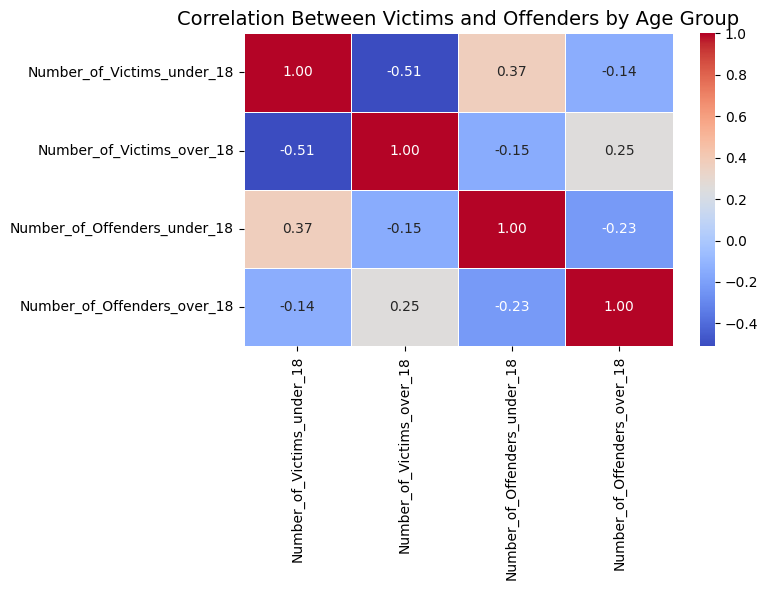

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
corr_matrix = df[['Number_of_Victims_under_18', 'Number_of_Victims_over_18',
                  'Number_of_Offenders_under_18', 'Number_of_Offenders_over_18']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title("Correlation Between Victims and Offenders by Age Group", fontsize=14)
plt.tight_layout()
plt.show()


Conclusion: There is a moderate negative correlation (-0.51) between victims under 18 and victims over 18, suggesting that incidents tend to involve either minors or adults, but rarely both.

Victims under 18 show a moderate positive correlation (0.37) with offenders under 18, indicating that when minors are victims, other minors are more likely to be the offenders.

Victims over 18 are weakly positively correlated (0.25) with adult offenders, aligning with the overall trend of adults being both primary victims and offenders.

In [91]:
from IPython.display import display,HTML
display(HTML("<h2><b>14. Which bias is most associated with youth offenders (under 18)?<b></h2>"))

In [92]:
df_youth_offenders = df[df['Number_of_Offenders_under_18'] > 0]
df_youth_offenders['Bias'].value_counts().head()


Bias
Anti-Gay (Male)                   3
Anti-Transgender                  2
Anti-Black or African American    2
Anti-Hispanic or Latino           2
Anti-Arab                         1
Name: count, dtype: int64

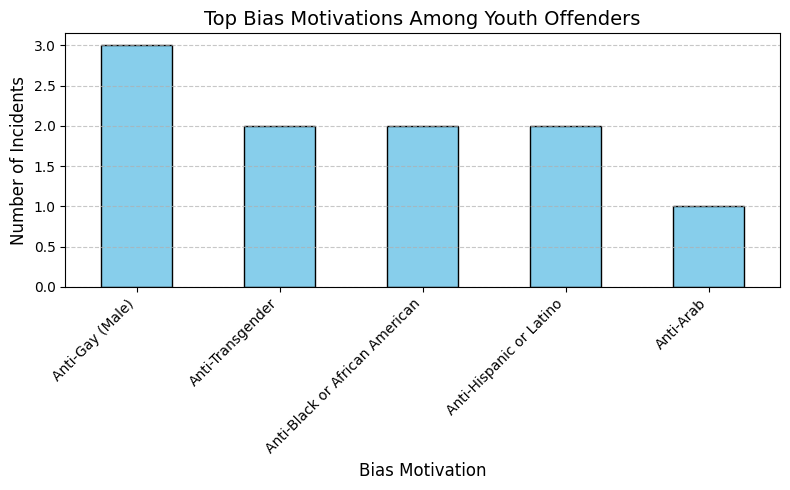

In [93]:
import matplotlib.pyplot as plt

# Filter for youth offenders and get top 5 biases
df_youth_offenders = df[df['Number_of_Offenders_under_18'] > 0]
youth_bias_counts = df_youth_offenders['Bias'].value_counts().head()

# Plotting
plt.figure(figsize=(8, 5))
youth_bias_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top Bias Motivations Among Youth Offenders", fontsize=14)
plt.xlabel("Bias Motivation", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Conclusion: The most frequent bias was Anti-Gay (Male), with 3 incidents.

This was followed by Anti-Transgender, Anti-Black or African American, and Anti-Hispanic or Latino biases, each with 2 cases.

This suggests that LGBTQ+ and racial/ethnic minorities are the primary targets when hate crimes are committed by minors, highlighting the presence of discriminatory attitudes even among youth.

In [94]:
from IPython.display import display,HTML
display(HTML("<h2><b>15. How many incidents involved only adult participants (victims & offenders over 18)?<b></h2>"))

In [95]:
adult_only = df[
    (df['Number_of_Victims_under_18'] == 0) &
    (df['Number_of_Offenders_under_18'] == 0)
]
adult_only.shape[0]


205

Conclusion:This confirms that the vast majority of hate crimes occur between adults, reinforcing earlier findings that hate crime activity is predominantly an adult-driven phenomenon.

In [96]:
from IPython.display import display,HTML
display(HTML("<h2><b>16. What is the average number of offenders involved per incident each year?<b></h2>"))

In [97]:
df['Total_Offenders'] = df['Number_of_Offenders_under_18'] + df['Number_of_Offenders_over_18']

df.groupby('Year')['Total_Offenders'].mean()


Year
2017    1.058824
2018    1.100000
2019    1.636364
2020    0.958333
2021    1.000000
2022    1.078947
2023    1.028571
2024    1.428571
2025    1.076923
Name: Total_Offenders, dtype: float64

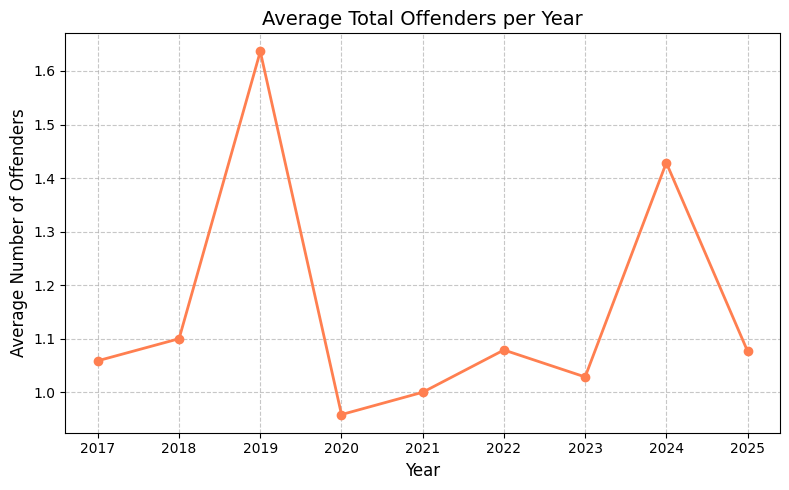

In [98]:
import matplotlib.pyplot as plt

# Calculate average total offenders per year
df['Total_Offenders'] = df['Number_of_Offenders_under_18'] + df['Number_of_Offenders_over_18']
avg_offenders_per_year = df.groupby('Year')['Total_Offenders'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_offenders_per_year.plot(kind='line', marker='o', color='coral', linewidth=2)

plt.title("Average Total Offenders per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Number of Offenders", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Conclusion: This suggests that while most hate crimes involve a single offender, certain years (like 2019 and 2024) saw a higher tendency for group involvement in hate crimes — potentially linked to organized or coordinated incidents.

Overall Conclusion: 
    The hate crimes dataset (2017–2025) shows a rising trend in reported incidents, with 2024 having the highest number of cases. Most hate crimes occurred in November, and the majority involved adult victims and adult offenders, with very few incidents involving minors. The most common offenses were Criminal Mischief and Assault, often driven by biases such as Anti-Black, Anti-Gay (Male), and Anti-Jewish sentiments. Correlation analysis indicated that offenders and victims are usually from the same age group. Overall, hate crimes in this dataset are predominantly adult-driven, recurring annually, and often fueled by racial or sexual orientation bias.

    includes: Data cleaning

            Feature extraction

            Time-based trends

            Victim/offender demographics

            Bias and offense analysis

            Correlation findings